In [ ]:
!unzip '/content/archive (9).zip'

Archive:  /content/archive (9).zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

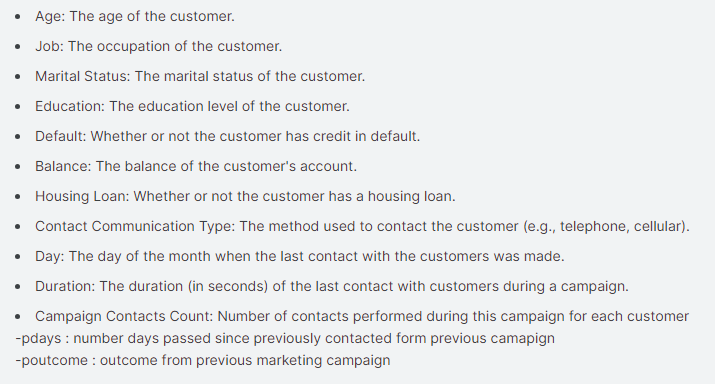

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data = pd.concat([train,test])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(49732, 17)

In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

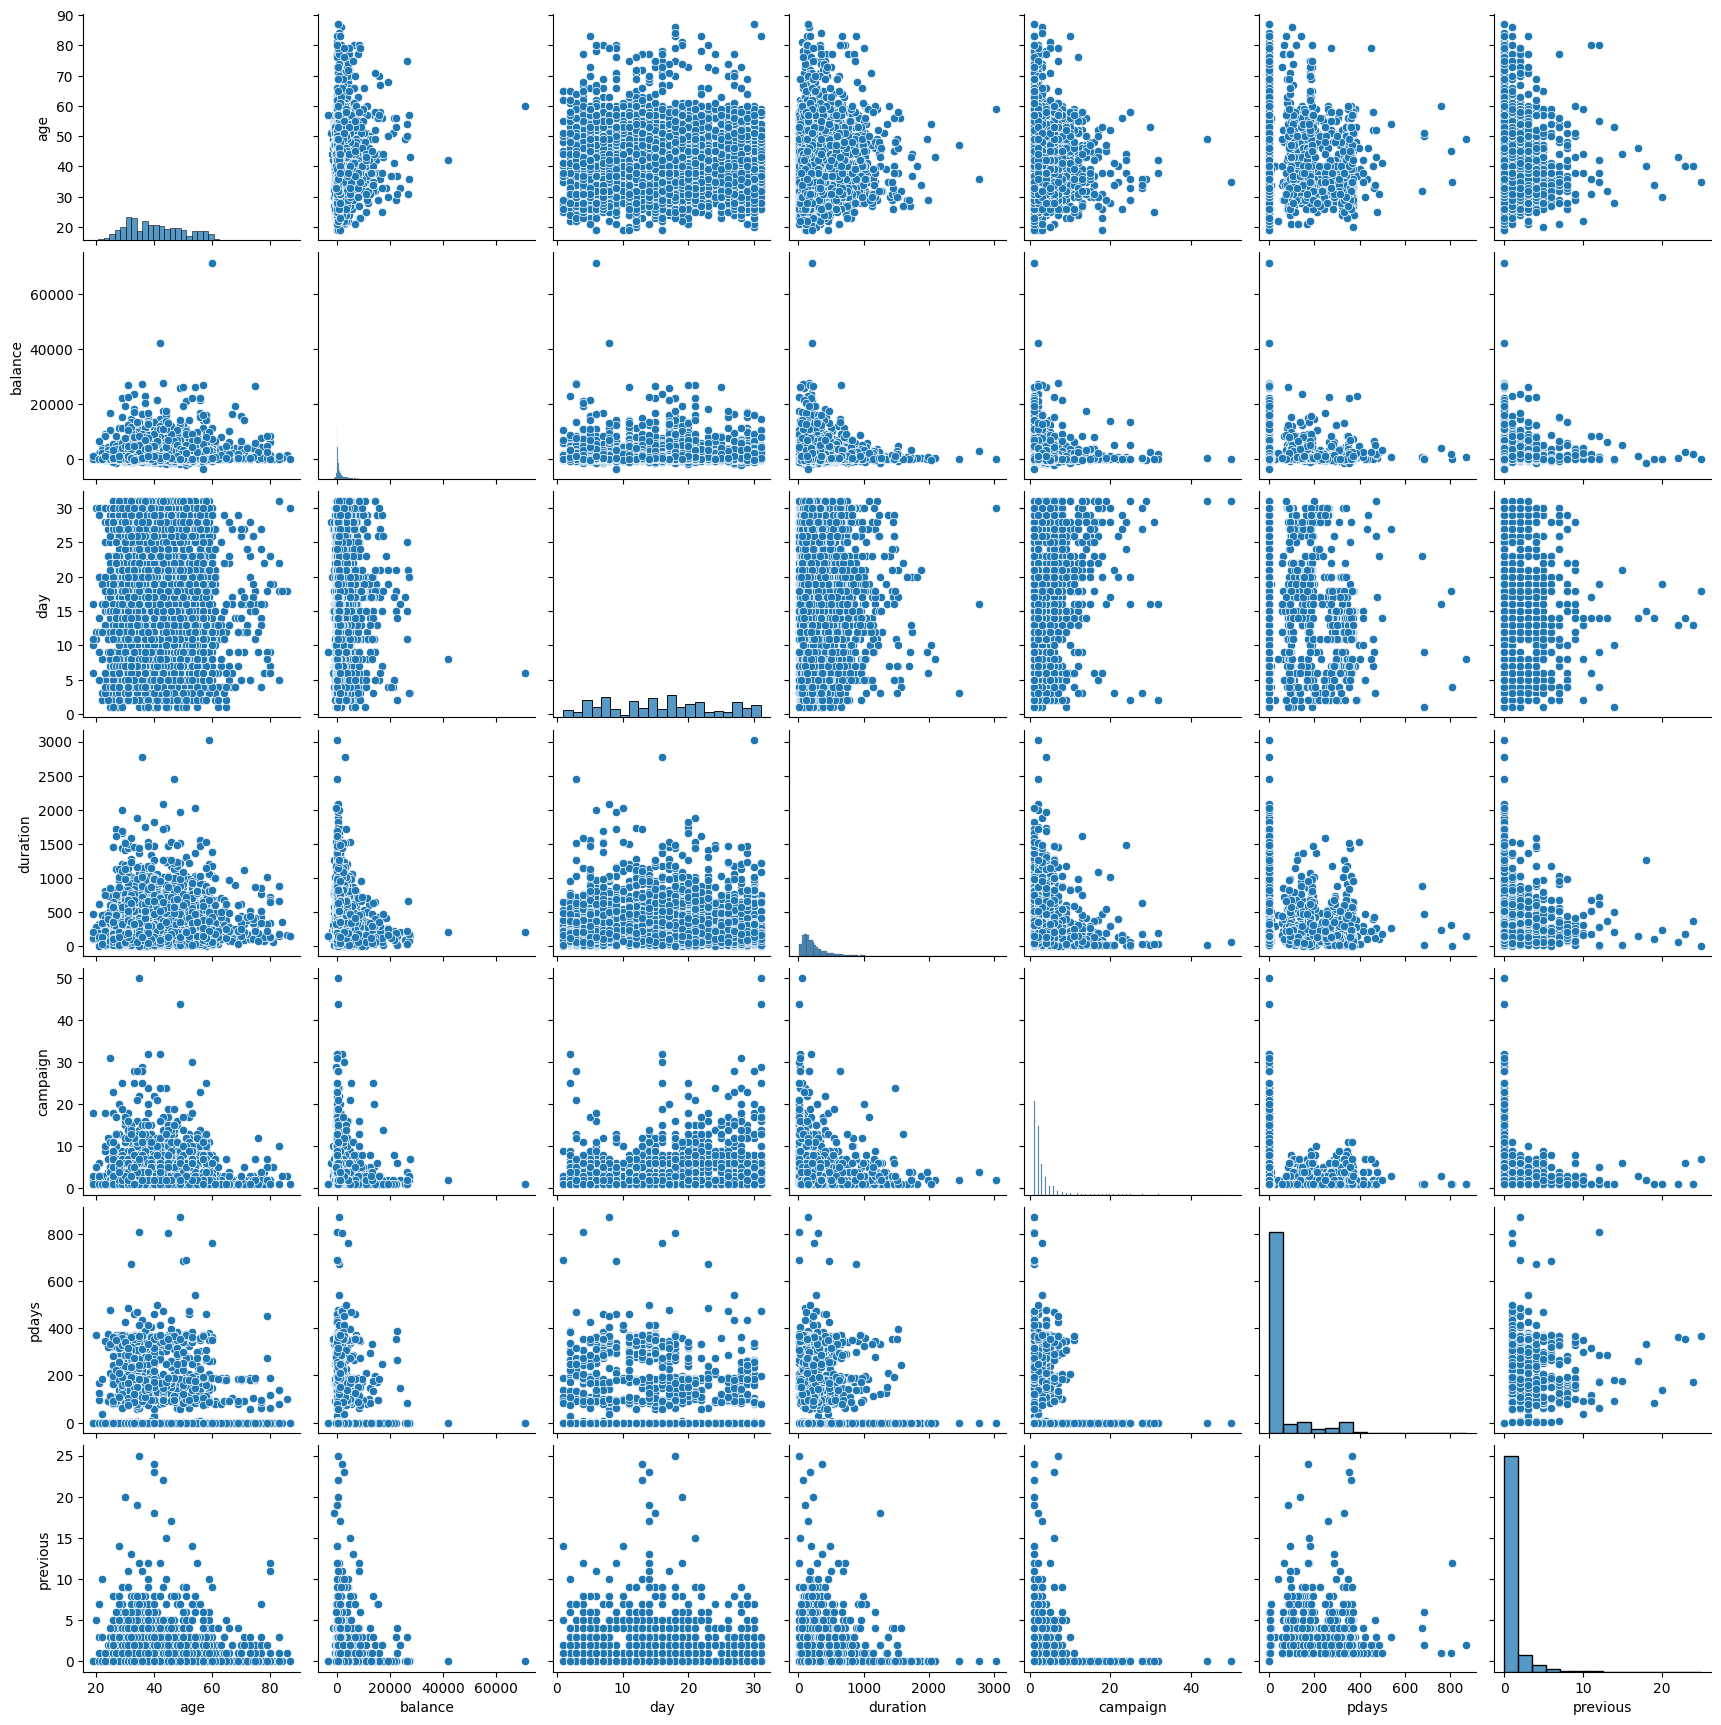

In [ ]:
sns.pairplot(data,hue='y')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096564,-0.009880,-0.004399,0.003877,-0.022419,0.000928
balance,0.096564,1.000000,0.003348,0.018195,-0.014147,0.003968,0.017243
day,-0.009880,0.003348,1.000000,-0.029674,0.162336,-0.093166,-0.052083
duration,-0.004399,0.018195,-0.029674,1.000000,-0.083061,-0.000478,0.002330
campaign,0.003877,-0.014147,0.162336,-0.083061,1.000000,-0.089042,-0.035162
pdays,-0.022419,0.003968,-0.093166,-0.000478,-0.089042,1.000000,0.461822
previous,0.000928,0.017243,-0.052083,0.002330,-0.035162,0.461822,1.000000


<Axes: xlabel='y', ylabel='balance'>

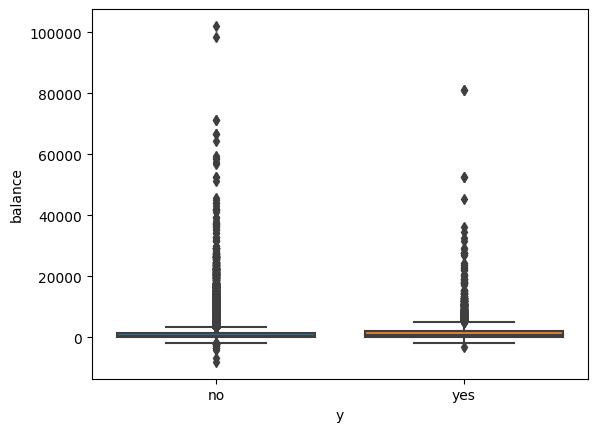

In [ ]:
sns.boxplot(x=df['poutcome'],y=df['balance'])

In [ ]:
sns.heatmap(train_test.isnull())
plt.show()

<Axes: xlabel='poutcome', ylabel='balance'>

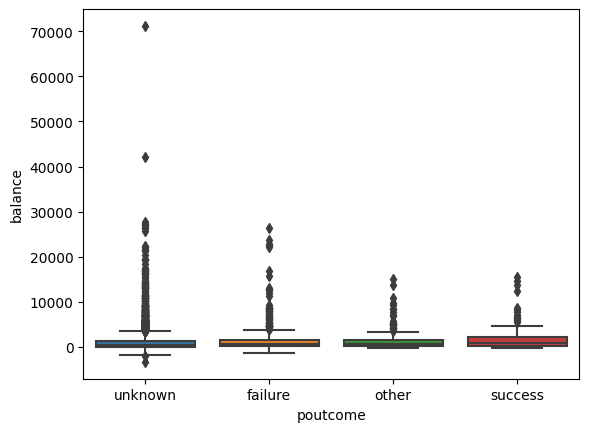

In [ ]:
sns.boxplot(x=df['poutcome'],y=df['balance'])

<Axes: xlabel='poutcome', ylabel='duration'>

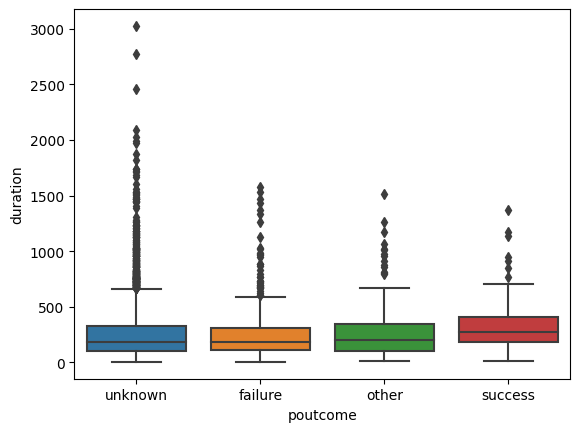

In [ ]:
sns.boxplot(x=df['poutcome'],y=df['duration'])

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#job vs y
data.groupby(['job'])['y'].value_counts()

job            y  
admin.         no     4960
               yes     689
blue-collar    no     9901
               yes     777
entrepreneur   no     1517
               yes     138
housemaid      no     1229
               yes     123
management     no     8995
               yes    1432
retired        no     1924
               yes     570
self-employed  no     1555
               yes     207
services       no     4164
               yes     407
student        no      734
               yes     288
technician     no     7442
               yes     923
unemployed     no     1216
               yes     215
unknown        no      285
               yes      41
Name: y, dtype: int64

<Axes: xlabel='job'>

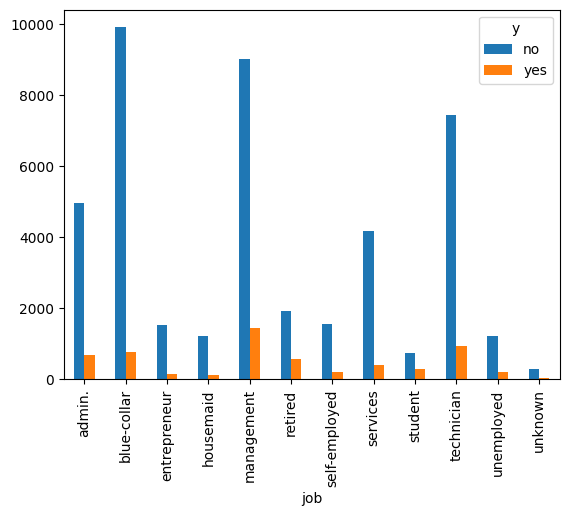

In [ ]:
pd.crosstab(data['job'],data['y']).plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_columns = data.select_dtypes('object').columns
object_columns[:-1]

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
encoder = LabelEncoder()
data[object_columns[:-1]] = data[object_columns[:-1]].apply(encoder.fit_transform)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [ ]:
#Manual Encoding
rule = {'no':0,'yes':1}
data['y'] = data['y'].map(rule)

In [ ]:
zero = data[data['y']==0].sample(5810,random_state=32)
one = data[data['y']==1]

#concat

data_ = pd.concat([zero,one])

In [ ]:
data_['y'].value_counts()

0    5810
1    5810
Name: y, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
xgb = XGBClassifier()
x = data_.drop(['y'],axis=1)
y = data_['y']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=30)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
log = LogisticRegression()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb.score(x_test,y_test)

0.858433734939759

In [ ]:
#Data Imbalance
data['y'].value_counts()

0    43922
1     5810
Name: y, dtype: int64

In [ ]:
pd.DataFrame(y_pred)[0].value_counts()

0    19049
1      844
Name: 0, dtype: int64

<Axes: >

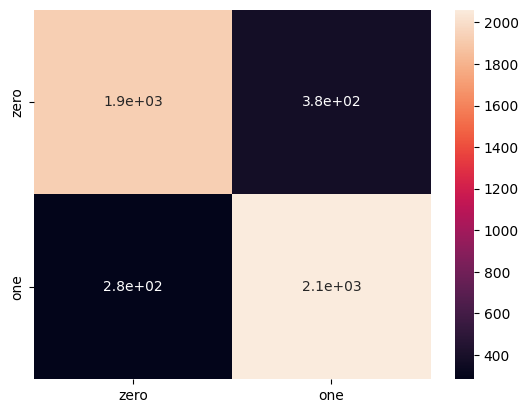

In [ ]:
from sklearn.metrics import confusion_matrix as cm
y_pred = xgb.predict(x_test)

sns.heatmap(cm(y_test,y_pred),annot=True,xticklabels=['zero','one'],
            yticklabels=['zero','one'])

In [ ]:
from sklearn.metrics import precision_score,recall_score

print(precision_score(y_test,y_pred)) # TP/TP+FP


print(recall_score(y_test,y_pred))  #TP/TP+FN

0.8460591133004927
0.8792662116040956


In [ ]:
list(enumerate(x.columns))

[(0, 'age'),
 (1, 'job'),
 (2, 'marital'),
 (3, 'education'),
 (4, 'default'),
 (5, 'balance'),
 (6, 'housing'),
 (7, 'loan'),
 (8, 'contact'),
 (9, 'day'),
 (10, 'month'),
 (11, 'duration'),
 (12, 'campaign'),
 (13, 'pdays'),
 (14, 'previous'),
 (15, 'poutcome')]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

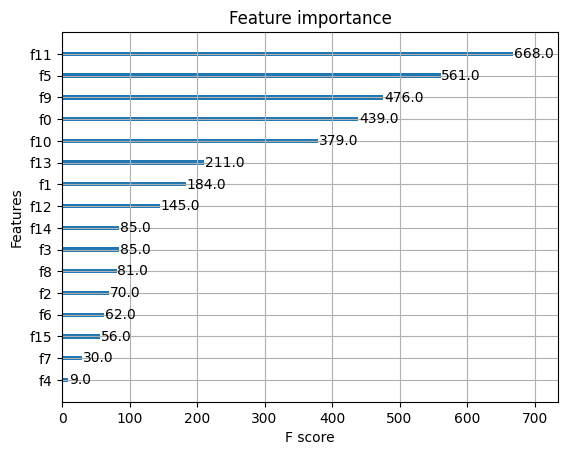

In [ ]:
from xgboost import plot_importance
plot_importance(xgb,)